<a href="https://colab.research.google.com/github/kanikaKanu90/notebook/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [4]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

train_images.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [5]:
type(train_images)

numpy.ndarray

In [ ]:
train_images[0]

In [7]:
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32') # /255


test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32')

In [ ]:
train_images[0]

In [9]:
train_labels[0], train_labels.shape, train_labels[0].shape

(5, (60000,), ())

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
import numpy as np

np.argmax(train_labels) # class with highest probability

4

In [12]:
train_labels = to_categorical(train_labels) #binary matrix
test_labels = to_categorical(test_labels)

In [13]:
train_labels[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [60]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=64)

In [19]:
test_images.shape, train_images.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [25]:
test_images[0].shape

(28, 28, 1)

In [ ]:
img= tf.squeeze(test_images[0])
img.shape

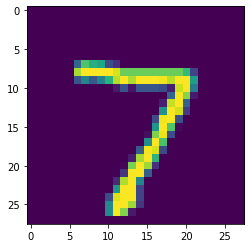

In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.imshow((tf.squeeze(test_images[0])))
plt.show()

In [28]:
testimag = test_images[0].reshape(1, 28, 28, 1)
testimag.shape

(1, 28, 28, 1)

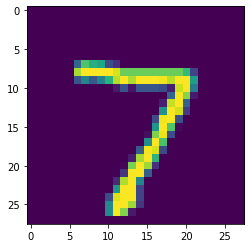

In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.imshow(tf.squeeze(testimag))
plt.show()

Features in FMap:, shape:  32 26 conv2d_4 (1, 26, 26, 32)
ncols:  2
Features in FMap:, shape:  32 13 max_pooling2d_4 (1, 13, 13, 32)
ncols:  2
Features in FMap:, shape:  64 11 conv2d_5 (1, 11, 11, 64)
ncols:  4
Features in FMap:, shape:  64 5 max_pooling2d_5 (1, 5, 5, 64)
ncols:  4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


Features in FMap:, shape:  64 3 conv2d_6 (1, 3, 3, 64)
ncols:  4


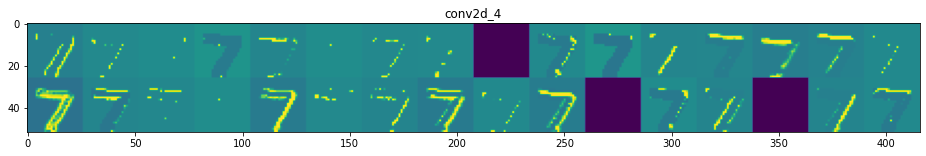

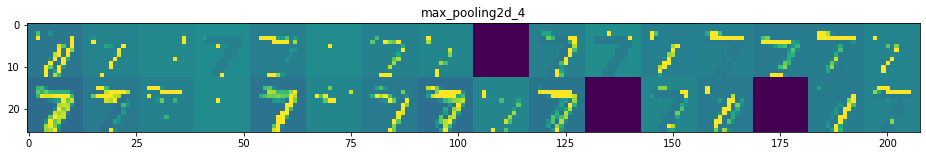

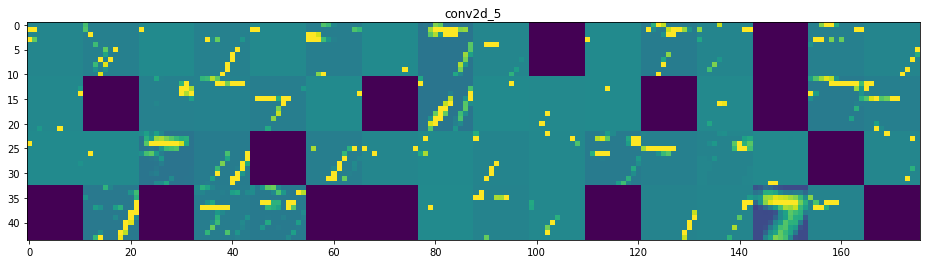

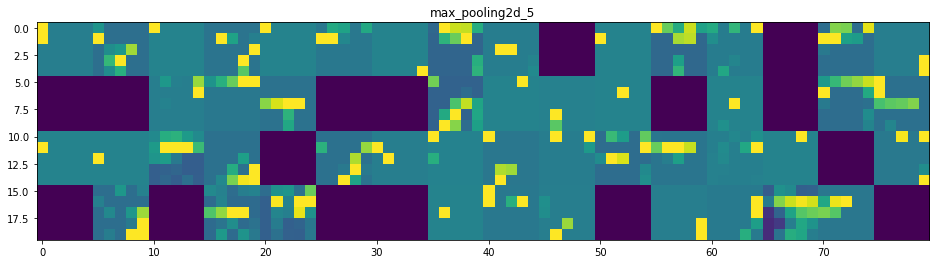

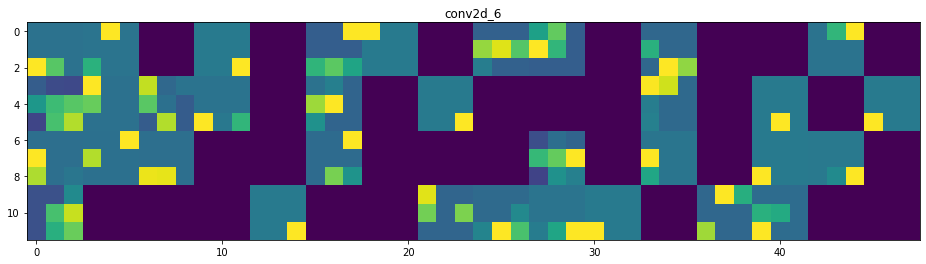

In [44]:
# Visualizing every channel in every intermediate activation

from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(testimag)

layer_names = []
for layer in model.layers[:5]:
  layer_names.append(layer.name)

images_per_row =16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1] #no. of featyres in feature map
  size = layer_activation.shape[1] # FM shape (1, size, size, n_features).
  print("Features in FMap:, shape: ", n_features, size,layer_name,layer_activation.shape )

  n_cols = n_features // images_per_row #Tiles the activation channels in this matrix
  print("ncols: ", n_cols)
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row): #Tiles each filter into a big horizontal grid
      channel_image = layer_activation[0,:, :,col * images_per_row + row]
      channel_image -= channel_image.mean() #Post-processes the feature to make it visually palatable
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
  scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [56]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
  loss = w * w

grad = tape.gradient(loss, w)
print(grad)  # => tf.Tensor([[ 2.]], shape=(1, 1), dtype=float32)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [62]:
# Visualizing convnet filters

from keras import backend as K

def generate_pattern(layer_name, filter_index, size=150):
  layer_output = model.get_layer(layer_name).output
  loss = K.mean(layer_output[:, :, :, filter_index])
  grads = tf.GradientTape.gradient(loss, model.input)[0]
  grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
  iterate = K.function([model.input], [loss, grads])
  input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
  step = 1.
  for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
  img = input_img_data[0]
  return deprocess_image(img)

plt.imshow(generate_pattern('conv2d_4', 0))

ValueError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

In [23]:
img_path = '/content/sample_data/45.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#  Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


In [24]:
img_tensor[0].shape

(150, 150, 3)

In [ ]:


import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import  models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])


In [ ]:
model.input 
# Model class apart is that it allows for models with multiple outputs, unlike Sequential.

In [ ]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activation_model

In [ ]:
activations = activation_model.predict(img_tensor)
activations[7]

In [ ]:
first_layer_activation = activations[0]
first_layer_activation1 = activations[1]
first_layer_activation2 = activations[2]
first_layer_activation3 = activations[3]
first_layer_activation4= activations[4]
first_layer_activation5 = activations[5]
first_layer_activation6 = activations[6]
first_layer_activation7 = activations[7]

print(first_layer_activation.shape, first_layer_activation1.shape,first_layer_activation2.shape,first_layer_activation3.shape,
      first_layer_activation4.shape,first_layer_activation5.shape,first_layer_activation6.shape,first_layer_activation7.shape)


In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

# Fourth channel of the activation of the first layer on the test cat picture
# This channel appears to encode a diagonal edge detector.
# note that your own channels may vary, because the specific filters learned by convolution layers aren’t deterministic.

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')

In [ ]:
layer_names = []
for layer in model.layers[:8]:
  layer.name
  layer_names.append(layer.name)
  
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): #display feature maps
  n_features = layer_activation.shape[-1] #no. of features in a feature map
  n_features

  size = layer_activation.shape[1] #The feature map has shape(1, size, size, n_features).
  size

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols): #tiles each feature
    for row in range(images_per_row):
      channel_image = layer_activation[0,:, :,col * images_per_row + row]
      channel_image -= channel_image.mean() 
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# There are a few things to note here:
#  The first layer acts as a collection of various edge detectors. At that stage, the
# activations retain almost all of the information present in the initial picture.
#  As you go higher, the activations become increasingly abstract and less visually
# interpretable. They begin to encode higher-level concepts such as “cat ear” and
# “cat eye.” Higher presentations carry increasingly less information about the
# visual contents of the image, and increasingly more information related to the
# class of the image.
#  The sparsity of the activations increases with the depth of the layer: in the first
# layer, all filters are activated by the input image; but in the following layers,
# more and more filters are blank. This means the pattern encoded by the filter
# isn’t found in the input image.

# We have just evidenced an important universal characteristic of the representations
# learned by deep neural networks: the features extracted by a layer become increasingly
# abstract with the depth of the layer. The activations of higher layers carry less
# and less information about the specific input being seen, and more and more information
# about the target (in this case, the class of the image: cat or dog). A deep neural
# network effectively acts as an information distillation pipeline, with raw data going in
# (in this case, RGB pictures) and being repeatedly transformed so that irrelevant information
# is filtered out (for example, the specific visual appearance of the image), and
# useful information is magnified and refined (for example, the class of the image).